In [8]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

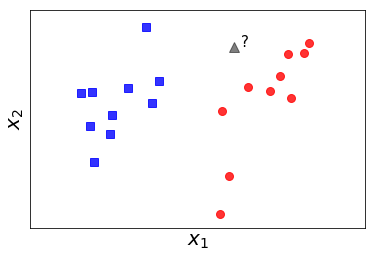

In [9]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .5)
plt.text(3.6, 2.5, r'?', fontsize=15)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('pla1.png', bbox_inches='tight', dpi = 300)
plt.show()

(20, 2)
     pcost       dcost       gap    pres   dres
 0: -1.9286e+00 -4.1878e+00  4e+01  6e+00  2e+00
 1: -1.6207e+00 -3.2517e+00  3e+00  3e-01  8e-02
 2: -2.0082e+00 -2.2760e+00  4e-01  3e-02  8e-03
 3: -2.2149e+00 -2.2294e+00  2e-02  1e-03  3e-04
 4: -2.2249e+00 -2.2250e+00  2e-04  1e-05  3e-06
 5: -2.2250e+00 -2.2250e+00  2e-06  1e-07  3e-08
 6: -2.2250e+00 -2.2250e+00  2e-08  1e-09  3e-10
Optimal solution found.
[ 8.54e-01]
[ 2.89e-10]
[ 1.37e+00]
[ 6.36e-10]
[ 4.04e-10]
[ 8.82e-10]
[ 6.35e-10]
[ 5.50e-10]
[ 8.33e-10]
[ 1.21e-10]
[ 6.87e-10]
[ 1.25e-10]
[ 2.22e+00]
[ 4.05e-09]
[ 1.27e-10]
[ 1.99e-10]
[ 2.14e-10]
[ 1.52e-10]
[ 3.75e-10]
[ 3.56e-10]



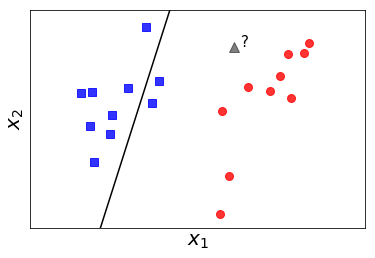

In [58]:
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
# X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

from cvxopt import matrix, solvers
# build P
Xbar = np.concatenate((X0, -X1), axis = 0)
print(Xbar.shape)
Q = matrix(Xbar.dot(Xbar.T))
p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) 
b = matrix(np.zeros((1, 1))) 

sol = solvers.qp(Q, p, G, h, A, b)

print(sol['x'])


# print(Xbar)

l = np.array(sol['x'])

w = Xbar.T.dot(l)
# print(w)

# b 
b = 0
NS = 0
S = []

# print(y.shape)

for i in range(2*N):
    if l[i] > 1e-8:
        NS += 1 
        S.append(i)
for n in range(NS):
    tmp = 0 
    for m in range(NS):
        tmp += l[S[m]]*y[:, S[m]]*X[:, S[n]].T.dot(X[:, S[m]])
    b += y[:, S[m]] - tmp 

b/= NS 
# print(b)

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .5)
plt.text(3.6, 2.5, r'?', fontsize=15)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

plt.plot(x1, y1, 'k')

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('pla1.png', bbox_inches='tight', dpi = 300)
plt.show()